In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#import warnings
import itertools
#warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [14]:
df = pd.read_csv('pivot_facility_for_TS.csv')

In [15]:
df

,2to4_Unit_Building,5plus_Unit_Building,Commercial_Other,Commercial_Unknown,Data_Center,Education_College_or_university,Education_Other_classroom,Education_Preschool_or_daycare,Education_Uncategorized,Food_Sales,Food_Service_Other,Food_Service_Restaurant_or_cafeteria,Food_Service_Uncategorized,Grocery_store_or_food_market,Health_Care_Inpatient,Health_Care_Outpatient_Clinic,Health_Care_Outpatient_Uncategorized,Health_Care_Uncategorized,Industrial,Laboratory,Lodging_Dormitory_or_fraternity_sorority,Lodging_Hotel,Lodging_Other,Lodging_Uncategorized,Mixed_Use_Commercial_and_Residential,Mixed_Use_Predominantly_Commercial,Mixed_Use_Predominantly_Residential,Multifamily_Uncategorized,Nursing_Home,Office_Bank_or_other_financial,Office_Medical_non_diagnostic,Office_Mixed_use,Office_Uncategorized,Parking_Garage,Public_Assembly_Drama_theater,Public_Assembly_Entertainment_culture,Public_Assembly_Library,Public_Assembly_Movie_Theater,Public_Assembly_Other,Public_Assembly_Recreation,Public_Assembly_Social_meeting,Public_Assembly_Stadium,Public_Assembly_Uncategorized,Public_Safety_Courthouse,Public_Safety_Fire_or_police_station,Public_Safety_Penitentiary,Public_Safety_Uncategorized,Religious_worship,Retail_Enclosed_mall,Retail_Strip_shopping_mall,Retail_Uncategorized,Retail_Vehicle_dealership_showroom,Service_Drycleaning_or_Laundry,Service_Uncategorized,Service_Vehicle_service_repair_shop,Warehouse_Distribution_or_Shipping_center,Warehouse_Nonrefrigerated,Warehouse_Refrigerated,Warehouse_Selfstorage,Warehouse_Uncategorized
0,31.88,85.87,87.83,80.04,555.69,102.41,88.27,80.16,103.38,210.25,29.3325,264.62,143.352,269.97,316.54,90.97,363.02,216.61,95.08,214.51,94.81,116.99,140.68,74.325,91.17,48.51,81.796667,84.89,153.26,127.03,173.16,81.973333,84.89,155.16,47.98,96.33,10.76,98.43,147.78,117.472,92.43,157.043333,66.3075,105.375,93.36,32.33,83.69,60.80,65.20,116.83,107.17,21.34,43.356,114.0125,175.20,32.91,38.44,74.62,29.09,35.93
1,31.88,53.01,95.45,101.66,616.12,95.58,74.83,80.16,51.20,428.16,29.3325,231.73,229.660,239.70,304.55,83.05,271.38,148.49,119.49,211.52,89.74,106.53,101.64,74.325,73.80,60.88,81.796667,81.27,141.81,105.68,119.60,81.973333,78.58,148.21,26.04,162.59,12.81,92.35,102.84,148.670,94.63,157.043333,66.3075,105.375,93.36,23.93,83.69,40.97,84.87,77.26,88.53,40.70,54.540,114.0125,95.09,34.02,37.60,70.17,21.34,35.93
2,31.88,53.01,89.39,23.47,300.99,119.10,73.11,80.16,42.36,110.17,31.4600,209.96,153.800,244.07,259.82,100.55,264.24,247.89,132.02,319.13,81.90,105.64,123.88,74.325,77.34,66.63,81.796667,86.51,139.12,75.28,123.11,81.973333,77.31,59.39,62.21,102.78,125.78,102.20,120.40,82.370,59.10,172.480000,75.0100,78.960,27.05,201.23,83.69,46.71,108.92,72.62,84.53,58.12,41.250,111.9500,45.03,44.17,34.93,100.61,23.28,35.93
3,31.88,53.01,83.04,124.86,330.11,108.41,78.21,116.70,41.72,133.34,27.2200,215.37,81.330,251.98,253.61,87.26,161.42,148.78,137.33,368.20,84.55,105.90,95.06,74.325,97.49,66.91,76.070000,88.22,140.50,83.72,121.71,79.770000,77.76,47.34,56.82,121.68,120.48,90.20,121.16,120.080,84.15,157.043333,71.3700,129.740,105.78,196.55,85.01,48.03,88.63,133.91,84.40,45.80,41.100,124.0200,49.17,41.71,38.40,89.69,23.81,35.93
4,31.60,36.46,90.90,126.85,307.89,109.11,70.45,63.47,72.81,121.02,27.6800,188.76,128.480,244.55,223.22,74.16,142.61,144.20,121.49,327.81,82.73,104.48,89.38,87.210,91.59,75.73,92.360000,84.44,126.89,87.90,108.52,88.860000,74.61,66.37,83.83,132.79,125.30,114.13,123.01,104.780,79.57,111.970000,63.0000,113.420,104.69,176.54,82.76,43.66,107.69,113.97,75.45,50.21,41.690,109.5900,67.39,41.23,38.05,103.88,20.81,35.59
5,32.16,36.70,99.45,117.24,304.95,107.93,66.19,60.31,87.47,120.29,30.9700,183.68,123.490,229.30,230.31,121.54,169.06,214.52,121.79,331.43,74.25,101.11,129.04,61.440,90.65,74.44,76.960000,80.13,118.72,87.28,108.80,77.290000,75.65,62.29,103.90,113.46,102.74,102.41,134.62,131.460,77.69,186.680000,55.8500,99.380,135.92,161.52,83.30,42.69,107.92,115.54,75.58,44.51,38.200,110.4900,159.43,37.11,40.65,100.04,18.91,36.27

In [16]:
df.shape

(6, 60)

In [22]:
test = df[['5plus_Unit_Building']]
test

,5plus_Unit_Building
0,85.87
1,53.01
2,53.01
3,53.01
4,36.46
5,36.70


<AxesSubplot:>

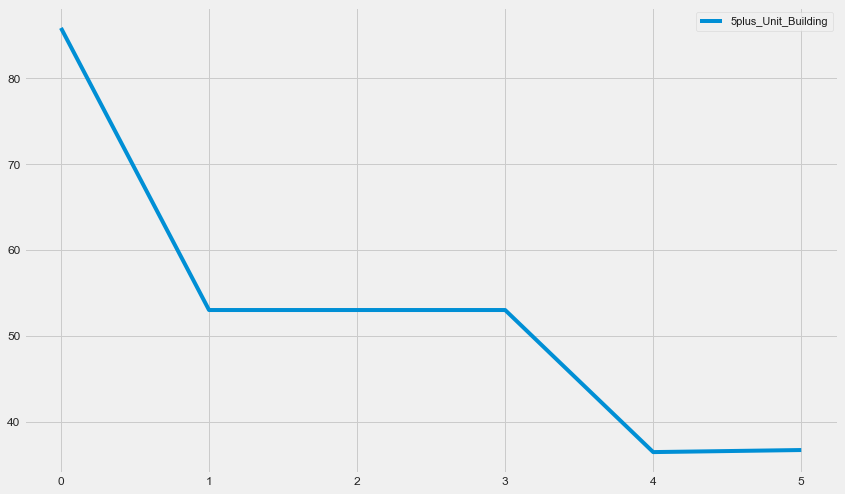

In [23]:
test.plot(figsize=(13, 8))

In [45]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

In [46]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, q, d))]

In [47]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [48]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(test, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False,
                                           results=mod.fit())
            print(1, param, param_seasonal, results.aic)
        except:
            continue